
##Credit Card Fraud Detection



In my project, I will use machine learning to credit card fraud Detection to reduce the loss of billions of dollars every year in credit card fraud.



**ML model selected:**
I will use Classification algorithms of supervised learning. There are many different classification models in machine learning:

• Logistic Regression. 
• K-Nearest Neighbor. 
• Random Forest Classification.

#1- Import libraries:

In [1]:
import numpy
import pandas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os 
import warnings


#2- Read Data:

In [2]:
data = pandas.read_csv('fraud.csv',parse_dates=True,
                     index_col=0)
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209.0,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002.0,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710.0,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780.0,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632.0,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453.0,40.4931,-91.8912,519.0,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1.388534e+09,39.946837,-91.333331,0.0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566.0,29.0393,-95.4401,28739.0,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1.388534e+09,29.661049,-96.186633,0.0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323.0,46.1966,-118.9017,3684.0,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1.388534e+09,46.658340,-119.715054,0.0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643.0,44.6255,-116.4493,129.0,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1.388534e+09,44.470525,-117.080888,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559608 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  559608 non-null  object 
 1   cc_num                 559608 non-null  int64  
 2   merchant               559608 non-null  object 
 3   category               559608 non-null  object 
 4   amt                    559608 non-null  float64
 5   first                  559608 non-null  object 
 6   last                   559608 non-null  object 
 7   gender                 559608 non-null  object 
 8   street                 559608 non-null  object 
 9   city                   559608 non-null  object 
 10  state                  559608 non-null  object 
 11  zip                    559608 non-null  float64
 12  lat                    559608 non-null  float64
 13  long                   559607 non-null  float64
 14  city_pop               559607 non-nu

#3- Data Preprocessing: 

In [4]:
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [5]:
data.dropna()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209.0,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002.0,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710.0,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780.0,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632.0,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453.0,40.4931,-91.8912,519.0,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1.388534e+09,39.946837,-91.333331,0.0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566.0,29.0393,-95.4401,28739.0,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1.388534e+09,29.661049,-96.186633,0.0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323.0,46.1966,-118.9017,3684.0,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1.388534e+09,46.658340,-119.715054,0.0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643.0,44.6255,-116.4493,129.0,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1.388534e+09,44.470525,-117.080888,0.0


In [6]:
data.dropna(inplace=True)

In [7]:
data['is_fraud'].value_counts()

0.0    557456
1.0      2151
Name: is_fraud, dtype: int64

In [8]:
data[data.duplicated()].shape

(3888, 22)

In [9]:
data.drop_duplicates()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209.0,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002.0,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710.0,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780.0,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632.0,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453.0,40.4931,-91.8912,519.0,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1.388534e+09,39.946837,-91.333331,0.0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566.0,29.0393,-95.4401,28739.0,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1.388534e+09,29.661049,-96.186633,0.0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323.0,46.1966,-118.9017,3684.0,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1.388534e+09,46.658340,-119.715054,0.0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643.0,44.6255,-116.4493,129.0,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1.388534e+09,44.470525,-117.080888,0.0


#4- Data visualization:

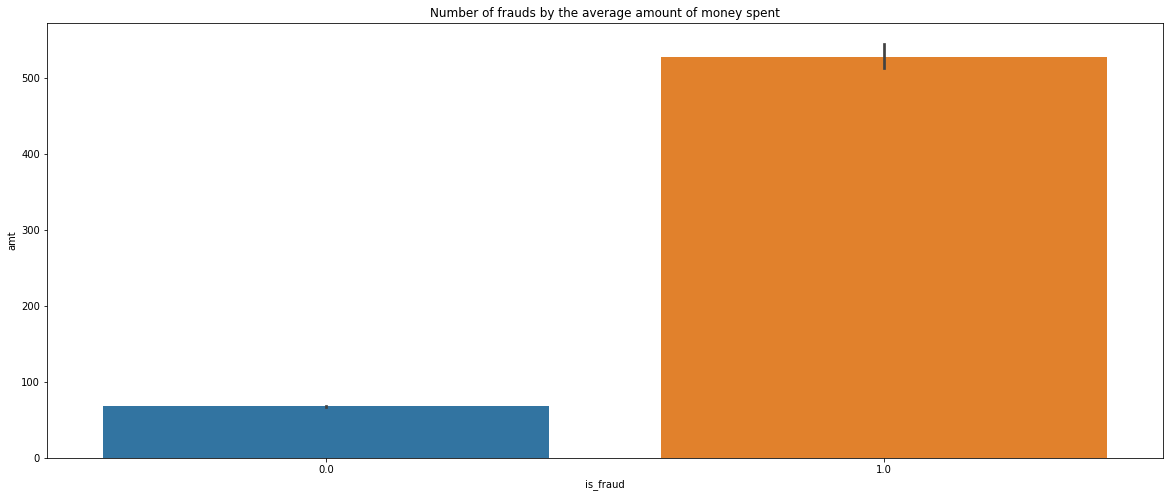

In [10]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by the average amount of money spent')
sns.barplot(x="is_fraud", y='amt', data=data)

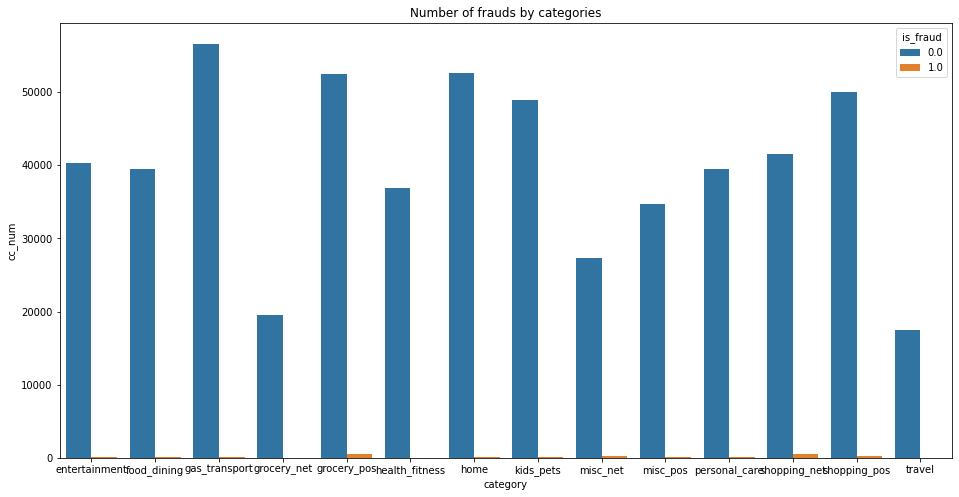

In [11]:
plt.figure(figsize=(16,8))
plt.title('Number of frauds by categories')
sns.barplot(x="category", y='cc_num' ,hue="is_fraud", data=data.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index())

Text(0.5, 1.0, 'Correlation Plot')

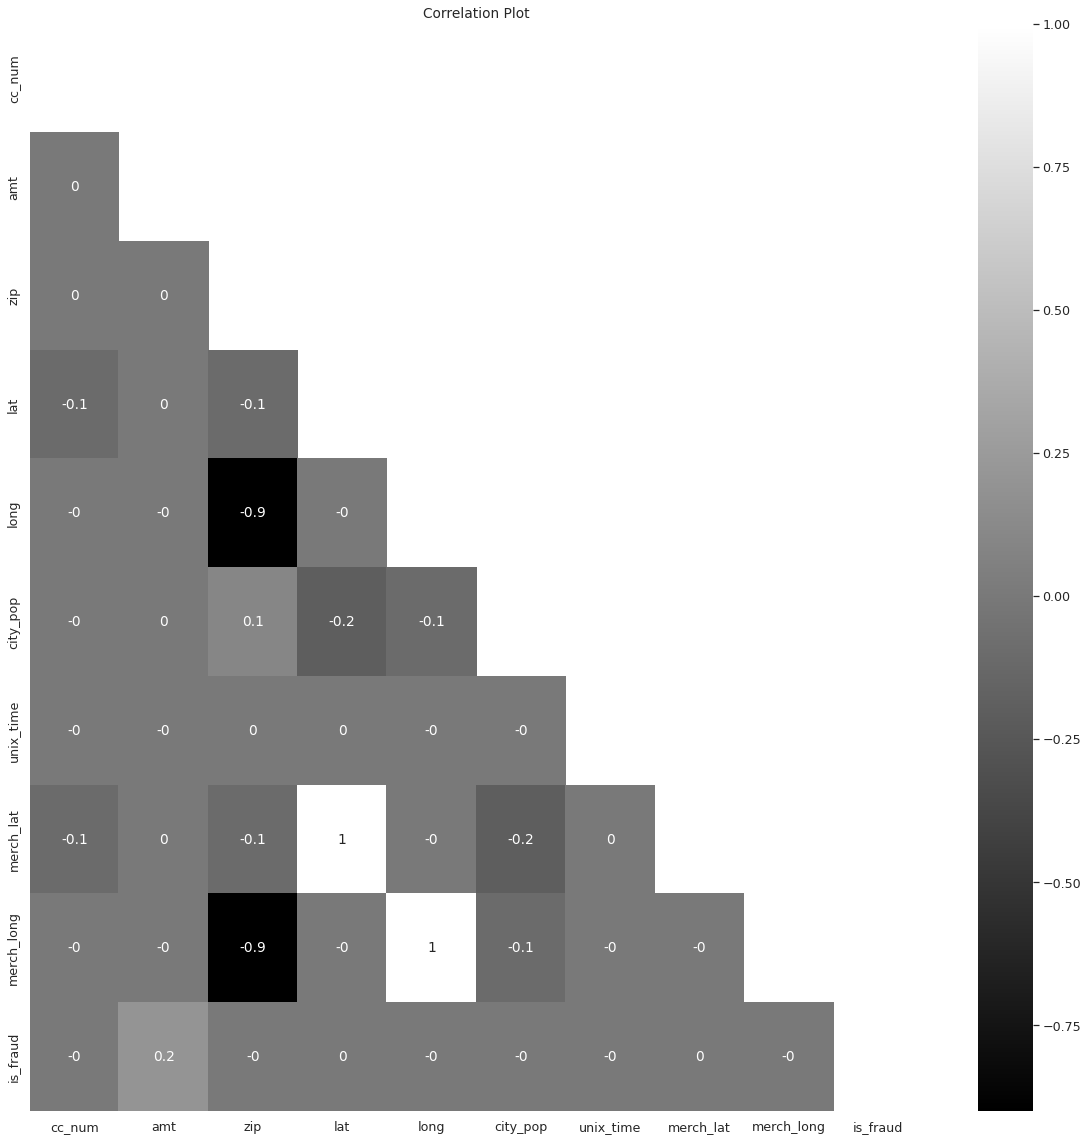

In [28]:
corr=data.corr().round(1)

sns.set(font_scale=1.15)
plt.figure(figsize=(20, 20))
sns.set_style("white")
sns.set_palette("bright")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

#5- Data splitting :

In [58]:
data_capy = data.select_dtypes(exclude = 'object')
X= data_capy.drop('is_fraud',axis=1)
y=data_capy.iloc[:, -1]



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [60]:
X_train.shape, y_train.shape

((447685, 9), (447685,))

#6-Resolving Imbalance by Oversampling:

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Feature/label dataset for training before applying SMOTE:  (447685, 9) (447685,)
Feature/label dataset for training after applying SMOTE:  (891910, 9) (891910,)
Distribution of label values after applying SMOTE:
 1.0    445955
0.0    445955
Name: is_fraud, dtype: int64


#7-Build Models:

###7.1 LogisticRegression:

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
lr =  LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, y_predict)))

Accuracy score of the Logistic Regression model is 0.9962384517789175


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111501
         1.0       0.00      0.00      0.00       421

    accuracy                           1.00    111922
   macro avg       0.50      0.50      0.50    111922
weighted avg       0.99      1.00      0.99    111922



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###7.2 Random Forest:

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [67]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score of the Random Forest model is 0.9962652561605404


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111501
         1.0       1.00      0.01      0.01       421

    accuracy                           1.00    111922
   macro avg       1.00      0.50      0.51    111922
weighted avg       1.00      1.00      0.99    111922



### 7.3 K-Nearest Neighbor:

In [69]:
from sklearn.neighbors import KNeighborsClassifier
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
y_predi = KNN.predict(X_test)

In [70]:
print('Accuracy score of the K-Nearest Neighbor model is {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score of the K-Nearest Neighbor model is 0.9962652561605404


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    111501
         1.0       0.81      0.89      0.85       421

    accuracy                           1.00    111922
   macro avg       0.91      0.94      0.92    111922
weighted avg       1.00      1.00      1.00    111922



#8-Evaluating Model Performance:

###8.1 Cross validation:

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_test, y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


###8.2 ROC:

0.9151441842356643


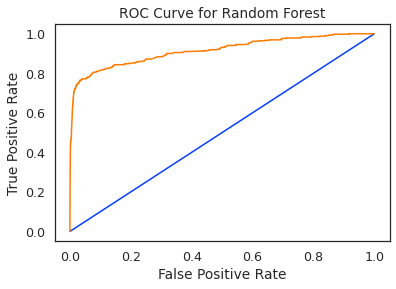

In [73]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
best_model = rf.fit(X_train, y_train)
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()